##### Setting up the Environment

In [ ]:
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
from model_profiler import model_profiler
from tqdm import tqdm
import numpy as np
import time

def evaluateModel(model, x_test, y_test, modelName):
	score = model.evaluate(x_test, y_test, verbose=1)

	pred = model.predict(x_test)
	x, y = [], []

	for sample in pred:
		x.append(sample.max() * 100)

	for confidence in x:
		y.append(((x > confidence).sum() / len(pred)) * 100)

	plt.plot(x, y, '.', color="black", markersize=1, label="Confidence of " + modelName + " Predictions")
	plt.ylim(max(y) + 1, min(y))
	plt.xlabel("Confidence (%)")
	plt.ylabel("Higher Confidence Predictions (%)")
	plt.legend()
	plt.show()

	return score[1]

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# this reshaping and input shape creation is convenient due to the three AlexNets requiring different inputs
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32') / 255
input_shape = (32, 32, 3)

units = ['GPU IDs', 'MFLOPs', 'MB', 'Million', 'MB']

#### 2-Layer MLP Network

/Users/koltonmusgrove/Programming/honors-thesis/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - accuracy: 0.2844 - loss: 1.9928
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - accuracy: 0.3913 - loss: 1.7633
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step - accuracy: 0.4148 - loss: 1.7185
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step - accuracy: 0.4172 - loss: 1.7053
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step - accuracy: 0.4204 - loss: 1.7032
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - accuracy: 0.4246 - loss: 1.6913
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 522us/step - accuracy: 0.4217 - loss: 1.6991
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - accuracy: 0.4242 - loss: 1.6812
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step - accuracy: 0.4302 - loss: 1.6721
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step - accuracy: 0.4345 - loss: 1.6793
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.4184 - loss: 1.7183
313/313 ━━━━━━━━━━━━━━

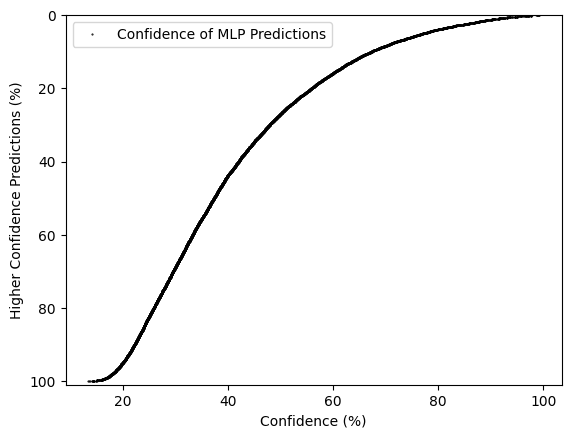

INFO:tensorflow:Assets written to: ./MLP/assets


INFO:tensorflow:Assets written to: ./MLP/assets


Saved artifact at './MLP'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor_699')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  16071109968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  16071102288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  15291941136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  15291944208: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [58]:

MLP = keras.models.Sequential()
MLP.add(
    keras.layers.Conv2D(10, kernel_size=(3, 3), strides=(4, 4), input_shape=input_shape)
)
MLP.add(keras.layers.Flatten())
MLP.add(keras.layers.Dense(10, activation="softmax"))

# Model training
MLP.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
MLP.build(input_shape=(None,) + input_shape)
MLP.fit(x=x_train, y=y_train, epochs=10)

# Model evaluation
# print(model_profiler(MLP, 32, use_units=units))
MLP_accuracy = evaluateModel(MLP, x_test=x_test, y_test=y_test, modelName="MLP")
MLP.export('./MLP')

#### LeNet-5

/Users/koltonmusgrove/Programming/honors-thesis/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3225 - loss: 1.8439
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4933 - loss: 1.4202
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5339 - loss: 1.3052
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5682 - loss: 1.2184
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5893 - loss: 1.1557
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6049 - loss: 1.1191
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6268 - loss: 1.0683
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6357 - loss: 1.0421
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6443 - loss: 1.0149
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6523 - loss: 0.9925
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.6204 - loss: 1.1004
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step

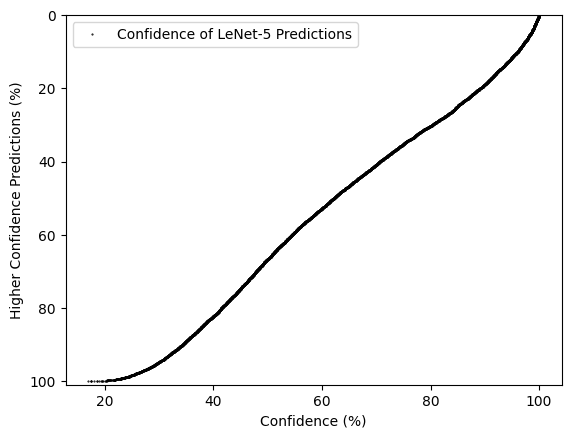

INFO:tensorflow:Assets written to: ./LeNet-5/assets


INFO:tensorflow:Assets written to: ./LeNet-5/assets


Saved artifact at './LeNet-5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor_709')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  15290883472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  15290882128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  15290886544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  15290887504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  15290884240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  15290880016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  15290883088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  15290885776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  15271099088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  15271098896: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [59]:
LeNet5 = keras.models.Sequential()

# 1st Convolutional Layer and Average Pooling
LeNet5.add(keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
LeNet5.add(keras.layers.AveragePooling2D(pool_size=(2, 2)))

# 2nd ConvolutionalLayer and Average Pooling
LeNet5.add(keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
LeNet5.add(keras.layers.AveragePooling2D(pool_size=(2, 2)))

# Fully-Connected Flatten()
LeNet5.add(keras.layers.Flatten())

# Three fully-connected layers
LeNet5.add(keras.layers.Dense(64, activation='relu'))
LeNet5.add(keras.layers.Dense(32, activation='relu'))
LeNet5.add(keras.layers.Dense(10, activation='softmax'))

# Model training
LeNet5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
LeNet5.fit(x=x_train, y=y_train, epochs=10)

# Model evaluation
# print(model_profiler(LeNet5, 32, use_units=units))
LeNet5_accuracy = evaluateModel(LeNet5, x_test=x_test, y_test=y_test, modelName="LeNet-5")
LeNet5.export('./LeNet-5')

#### AlexNet

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.3599 - loss: 1.7271
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.5698 - loss: 1.2252
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6269 - loss: 1.0637
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6610 - loss: 0.9549
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6916 - loss: 0.8674
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7173 - loss: 0.7953
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7485 - loss: 0.7149
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7638 - loss: 0.6686
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7814 - loss: 0.6087
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7992 - loss: 0.5675
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6874 - loss: 0.9785
313/313 ━━━━━━━━━━━━━━━━

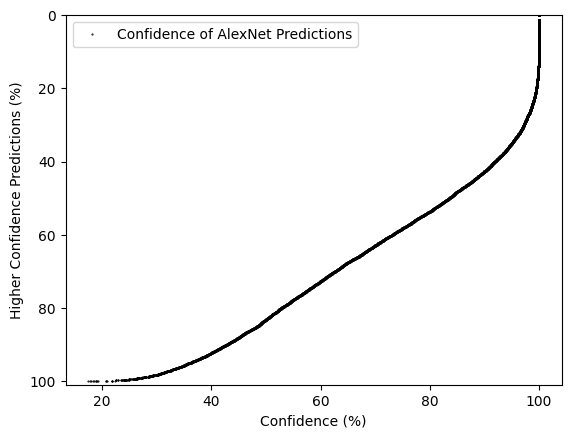

INFO:tensorflow:Assets written to: ./AlexNet/assets


INFO:tensorflow:Assets written to: ./AlexNet/assets


Saved artifact at './AlexNet'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor_880')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  15461796176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  15461795792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  15461804240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  15461798864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  15461803472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14430933392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14430935504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14430929744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14430936272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14430938576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14430935888: TensorSpec(shape=(), dtype=tf.resource, name=

In [62]:
AlexNet = keras.models.Sequential()

# 1st Convolutional Layer and Max Pooling
AlexNet.add(keras.layers.Conv2D(filters=32, input_shape=input_shape, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
AlexNet.add(keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid'))

# 2nd Convolutional Layer and Max Pooling
AlexNet.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
AlexNet.add(keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid'))

# 3rd Convolutional Layer
AlexNet.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))

# 4th Convolutional Layer
AlexNet.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))

# Max Pooling
AlexNet.add(keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

# Fully Connected layer
AlexNet.add(keras.layers.Flatten())
# 1st Fully Connected Layer
AlexNet.add(keras.layers.Dense(512, activation='relu'))

AlexNet.add(keras.layers.Dropout(0.3))

# Output Layer
AlexNet.add(keras.layers.Dense(10, activation='softmax'))

# Model training
AlexNet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
AlexNet.fit(x=x_train, y=y_train, epochs=10)

# Model evaluation
# print(model_profiler(AlexNet, 32, use_units=units))
AlexNet_accuracy = evaluateModel(AlexNet, x_test=x_test, y_test=y_test, modelName='AlexNet')
AlexNet.export('./AlexNet')

#### Calculating Pass on Rate

In [65]:
# Initialize an array to store all timing information and track pass-on counts
timings = []
total_samples = len(x_test)
passed_to_lenet = 0
passed_to_alexnet = 0

for i in tqdm(range(total_samples), desc="Processing samples"):
    timing = []
    sample = np.array(x_test[i], ndmin=4)

    # MLP logic
    MLP_start = time.time()    
    single_mlp_pred = MLP.predict(sample, verbose=0)  # Add verbose=0 to reduce output noise
    MLP_stop = time.time()
    timing.append(MLP_stop - MLP_start)

    if single_mlp_pred.max() <= AlexNet_accuracy:
        passed_to_lenet += 1
        
        # LeNet-5 Logic    
        LeNet_start = time.time()
        single_LeNet_pred = LeNet5.predict(sample, verbose=0)
        LeNet_stop = time.time()
        timing.append(LeNet_stop - LeNet_start)

        if single_LeNet_pred.max() <= AlexNet_accuracy:
            passed_to_alexnet += 1
            
            # AlexNet Logic
            AlexNet_start = time.time()
            single_AlexNet_pred = AlexNet.predict(sample, verbose=0)
            AlexNet_stop = time.time()
            timing.append(AlexNet_stop - AlexNet_start)
    
    timings.append(timing)

Processing samples: 100%|██████████| 10000/10000 [09:54<00:00, 16.83it/s]


#### Calculate Timing Stats

---- MLP ----
Samples processed: 9904 (99.04% of total)
Mean inference time: 23.66 ms
Std deviation: 2.45 ms
Min/Max times: 18.38/38.69 ms


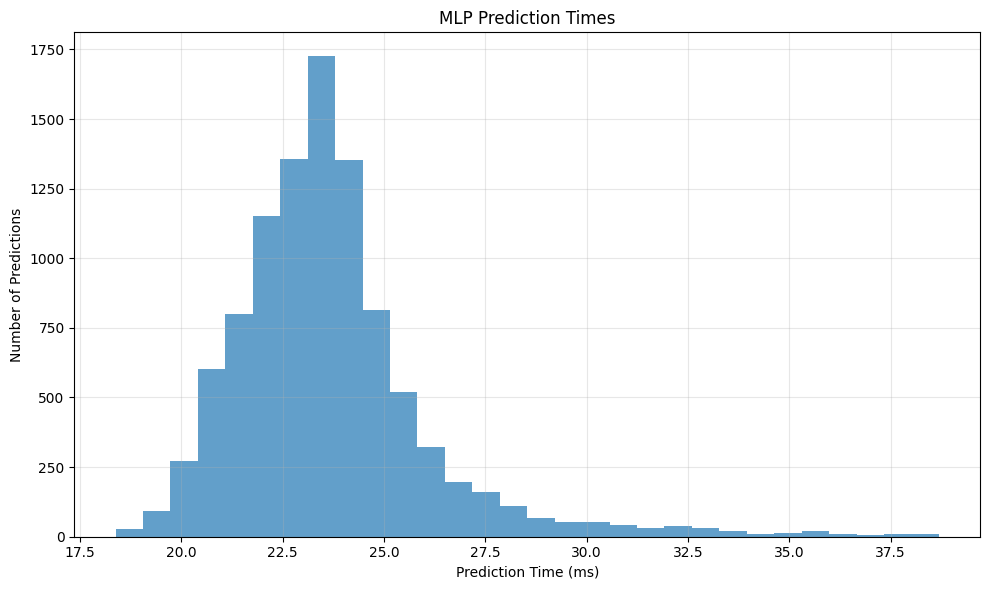

---- LeNet-5 ----
Samples processed: 9064 (90.64% of total)
Mean inference time: 23.41 ms
Std deviation: 2.45 ms
Min/Max times: 18.12/40.84 ms


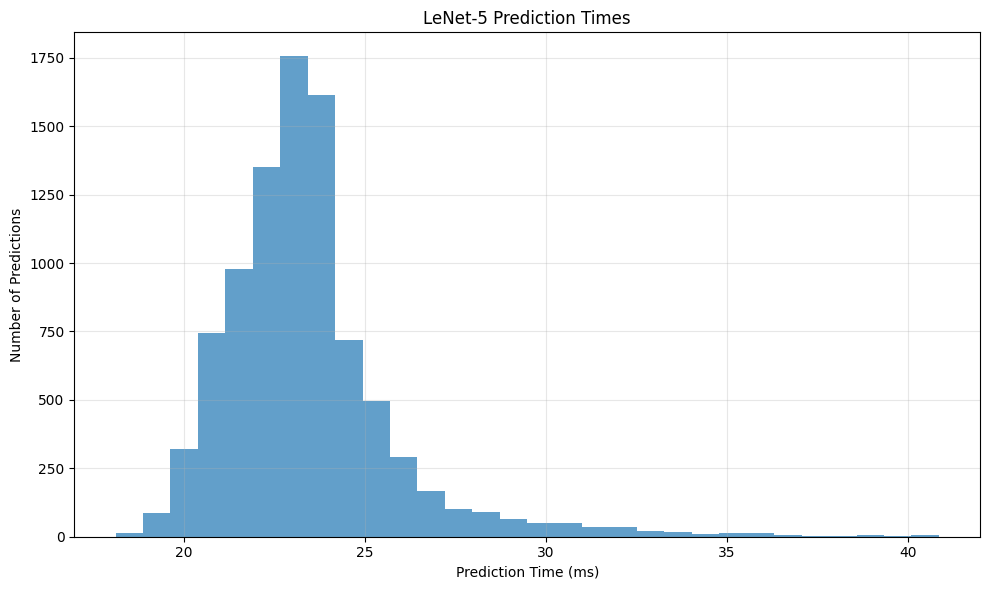

---- AlexNet ----
Samples processed: 5383 (53.83% of total)
Mean inference time: 24.28 ms
Std deviation: 1.92 ms
Min/Max times: 19.74/31.60 ms


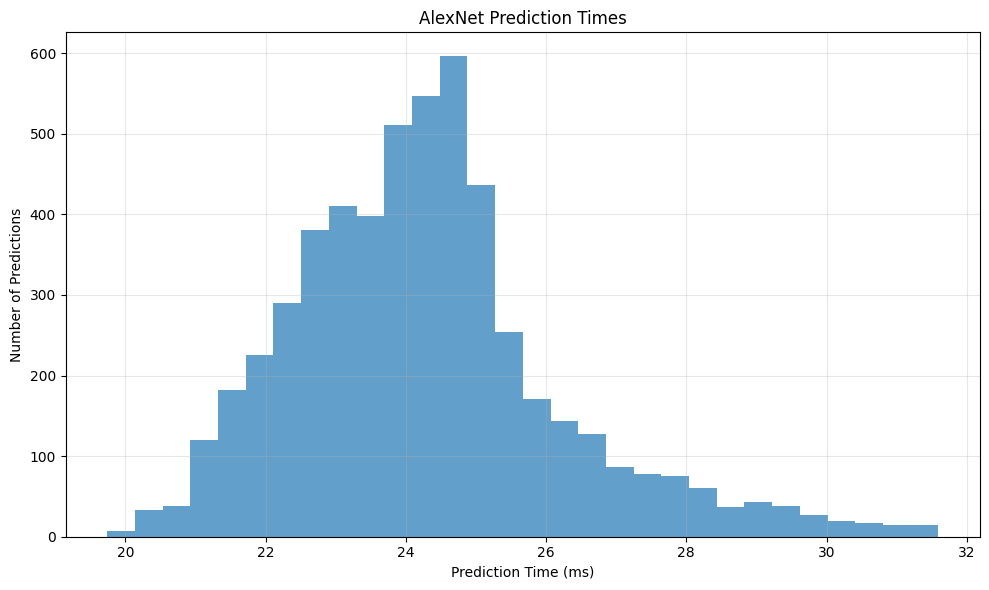


---- Cascade Efficiency Analysis ----
Total samples: 10000
MLP handled exclusively: 891 samples (8.91%)
Passed to LeNet-5: 9109 samples (91.09%)
Passed to AlexNet: 5538 samples (55.38%)

Average cascade inference time per sample: 57.73 ms
If all samples used only MLP: 23.66 ms per sample
If all samples used only AlexNet: 24.28 ms per sample
Speedup from using cascade: 0.42x


In [67]:
# Calculate and separate timings for analysis
MLP_timings, LeNet5_timings, AlexNet_timings = np.array([]), np.array([]), np.array([])

for timing in timings:
    if len(timing) >= 1:  # All samples should have MLP timing
        MLP_timings = np.append(MLP_timings, timing[0])
    if len(timing) >= 2:  # Samples that were passed to LeNet
        LeNet5_timings = np.append(LeNet5_timings, timing[1])
    if len(timing) >= 3:  # Samples that were passed to AlexNet
        AlexNet_timings = np.append(AlexNet_timings, timing[2])

def reject_outliers(data, m=2):
    if len(data) == 0:
        return data  # Handle empty arrays
    return data[np.abs(data - np.mean(data)) < m * np.std(data)]

def display_stats(timings, modelName):
    if len(timings) == 0:
        print(f"---- {modelName} ----")
        print("No samples processed by this model")
        return
        
    # convert to ms and round to 4 decimal points
    timings = np.around(np.multiply(timings, 1000), 4)

    print(f"---- {modelName} ----")
    print(f"Samples processed: {len(timings)} ({len(timings)/total_samples*100:.2f}% of total)")
    print(f"Mean inference time: {timings.mean():.2f} ms")
    print(f"Std deviation: {timings.std():.2f} ms")
    print(f"Min/Max times: {timings.min():.2f}/{timings.max():.2f} ms")

    plt.figure(figsize=(10, 6))
    plt.hist(timings, bins=30, alpha=0.7)
    plt.title(f"{modelName} Prediction Times")
    plt.xlabel("Prediction Time (ms)")
    plt.ylabel("Number of Predictions")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Apply outlier rejection
MLP_timings = reject_outliers(MLP_timings)
LeNet5_timings = reject_outliers(LeNet5_timings)
AlexNet_timings = reject_outliers(AlexNet_timings)

# Display model stats
display_stats(MLP_timings, "MLP")
display_stats(LeNet5_timings, "LeNet-5")
display_stats(AlexNet_timings, "AlexNet")

# Print cascade efficiency statistics
print("\n---- Cascade Efficiency Analysis ----")
print(f"Total samples: {total_samples}")
print(f"MLP handled exclusively: {total_samples - passed_to_lenet} samples ({(total_samples - passed_to_lenet)/total_samples*100:.2f}%)")
print(f"Passed to LeNet-5: {passed_to_lenet} samples ({passed_to_lenet/total_samples*100:.2f}%)")
print(f"Passed to AlexNet: {passed_to_alexnet} samples ({passed_to_alexnet/total_samples*100:.2f}%)")

# Calculate average inference time per sample in the cascade
avg_time_per_sample = (
    np.sum(MLP_timings) + 
    np.sum(LeNet5_timings) + 
    np.sum(AlexNet_timings)
) / total_samples

print(f"\nAverage cascade inference time per sample: {avg_time_per_sample*1000:.2f} ms")

# Compare with theoretical time if all samples used only the fastest or slowest model
print(f"If all samples used only MLP: {np.mean(MLP_timings)*1000:.2f} ms per sample")
if len(AlexNet_timings) > 0:
    print(f"If all samples used only AlexNet: {np.mean(AlexNet_timings)*1000:.2f} ms per sample")
    print(f"Speedup from using cascade: {np.mean(AlexNet_timings)/avg_time_per_sample:.2f}x")